In [ ]:
# CPC - SPP

# <font color = 'blue'> ROSSMANN Stores Sales Predictions  </font>

# Indice

1. Context
2. Chalenge
3. Soluction Development
4. Conclusion & Demonstration
5. Next Steps

# <font color = 'blue'> 1. Context </font>

- Reuniao Mensal de Resultados.
- CFO pediu uma Previsao de Vendas das Proximas 6 semanas de cada Loja.

# <font color = 'blue'> 2. Chalenge </font>

# Problem
- Definicao do Budget para a Reforma das Lojas.

# Causes
- Predicao de Vendas Atual apresentava muita Divergencia.
- O processo de Predicao de Vendas e baseado em Experiencias Passadas.
- Toda a Previsao de Vendas e feita Manualmente pelas 1115 Lojas da Rossmann.
- A visualizacao das Vendas e Limitada ao Computador.

# Soluction
- Usar Machine Learning para realizar a Previsao do Budget para a Reforma das Lojas.
- Visualizacao das Predicoes de Vendas poderao ser feitas pelo Smartphone.

# <font color = 'blue'> 3. Soluction Development </font>

# DATA DESCRIPTION

## Data Dimensions

In [9]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Columns: 18


## Descriptive Statistical

In [20]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.000,1115.000,1114.000,558.430,558.000,321.908,-0.001,-1.201
1,day_of_week,1.000,7.000,6.000,3.998,4.000,1.997,0.002,-1.247
2,sales,0.000,41551.000,41551.000,5773.819,5744.000,3849.924,0.641,1.778
3,customers,0.000,7388.000,7388.000,633.146,609.000,464.412,1.599,7.092
4,open,0.000,1.000,1.000,0.830,1.000,0.376,-1.758,1.091
5,promo,0.000,1.000,1.000,0.382,0.000,0.486,0.488,-1.762
6,school_holiday,0.000,1.000,1.000,0.179,0.000,0.383,1.678,0.815
7,competition_distance,20.000,200000.000,199980.000,5935.443,2330.000,12547.647,10.242,147.790
8,competition_open_since_month,1.000,12.000,11.000,6.787,7.000,3.311,-0.042,-1.233
9,competition_open_since_year,1900.000,2015.000,115.000,2010.325,2012.000,5.516,-7.236,124.071


## Mind Map Hyphotesis

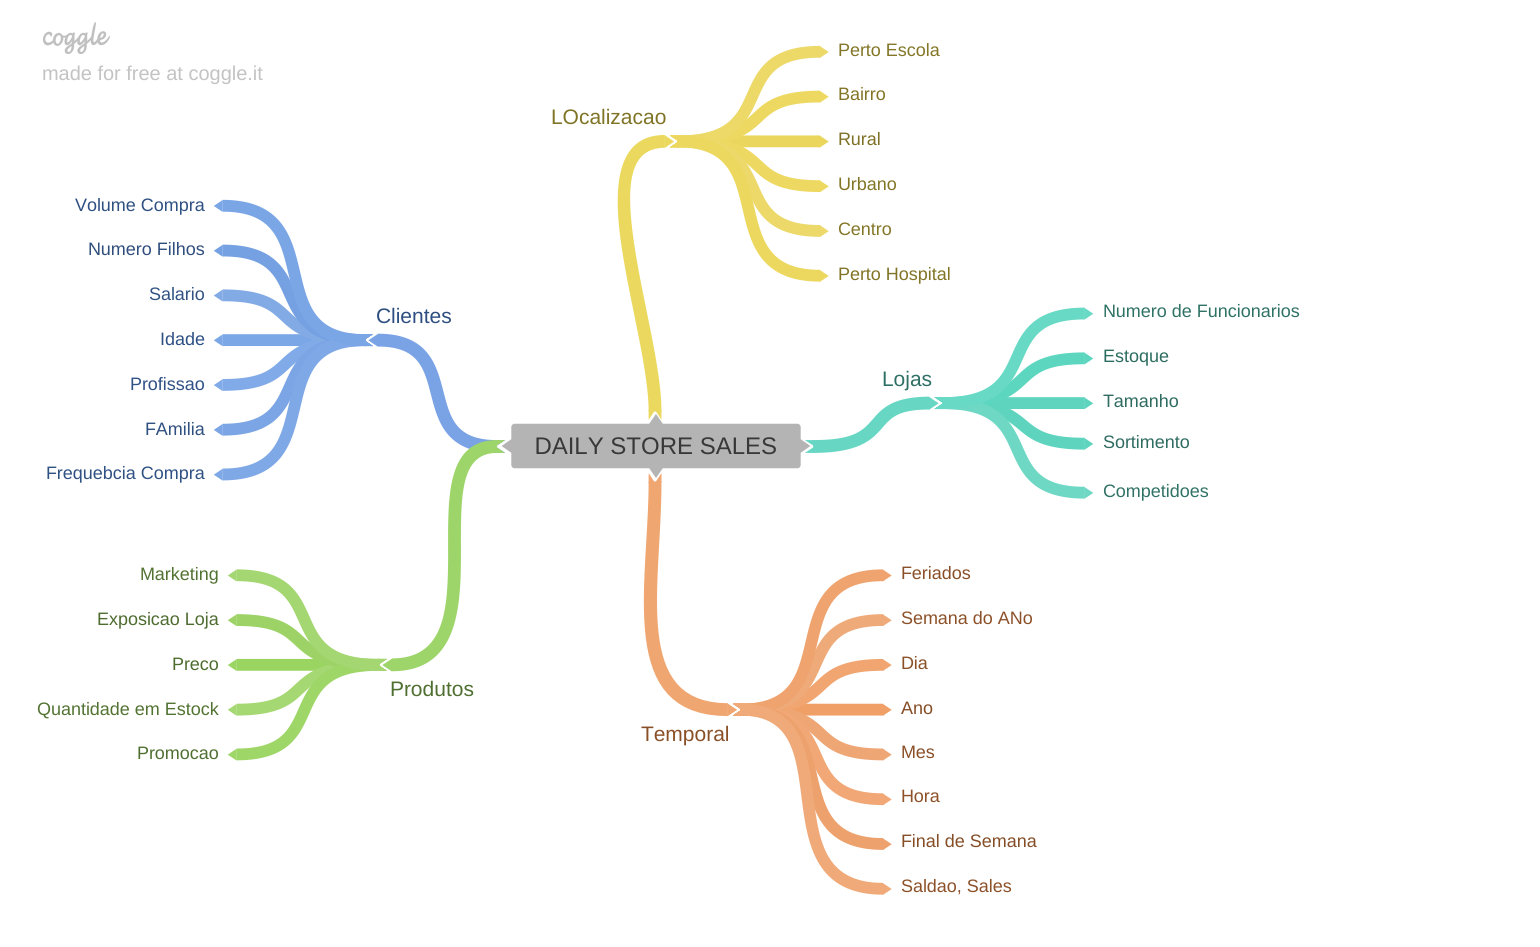

In [26]:
Image('img/MindMapHypothesis.png')

## EDA Hyphotesis

**1.** Stores with higher assortment should sell more.

**2.** Stores with closer competitors should sell less.

**3.** Stores with longer-term competitors should sell more.

**4.** Stores with longer active promotions should sell more.

**5.** Stores with more promotion days should sell more.

**6.** Stores with more consecutive promotions should sell more.

**7.** Stores open during the Christmas holiday should sell more.

**8.** Stores should sell more over the years.

**9.** Stores should sell more in the second half of the year.

**10.** Stores should sell more after the 10th of each month.

**11.** The stores should sell less on weekends.

**12.** The stores should sell less during school holidays.

# EXPLORATORY DATA ANALYSIS (EDA)

## Response Variable

- The variable sales has a litte bit of kurtosis and presents a positive skew positivo, which is to le left.

<AxesSubplot:xlabel='sales', ylabel='Count'>

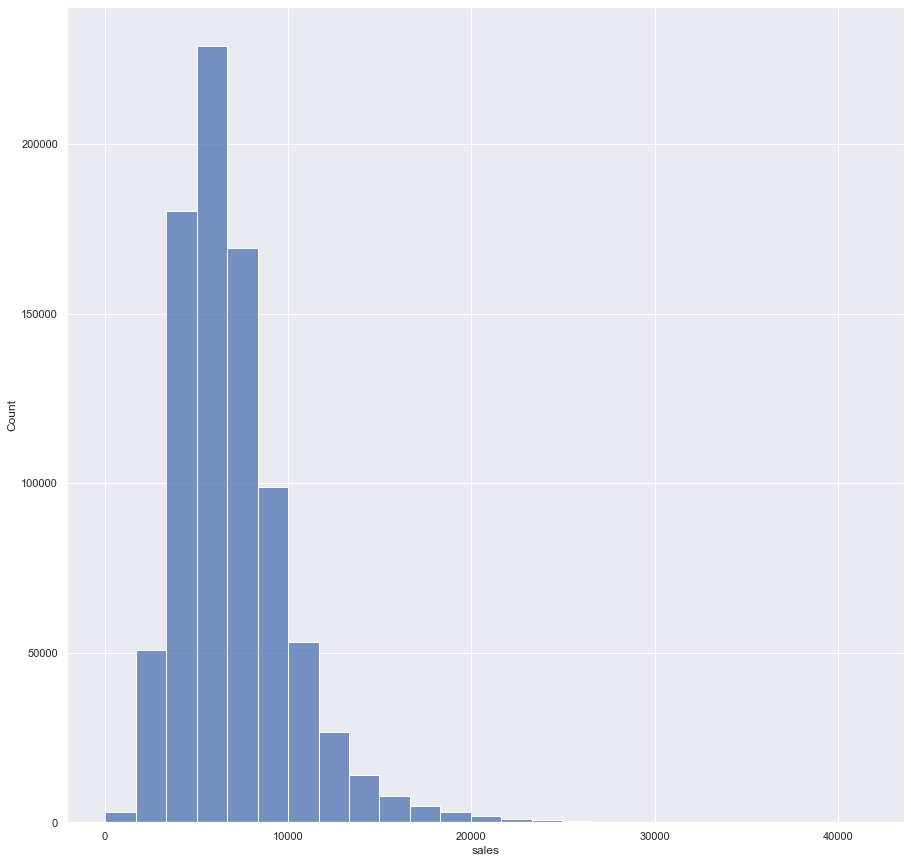

In [36]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.histplot(df4['sales'], bins = 25)
# The variable sales has a litte bit of kurtosis and presents a positive skew positivo, which is to le left.

## Numerical Variable

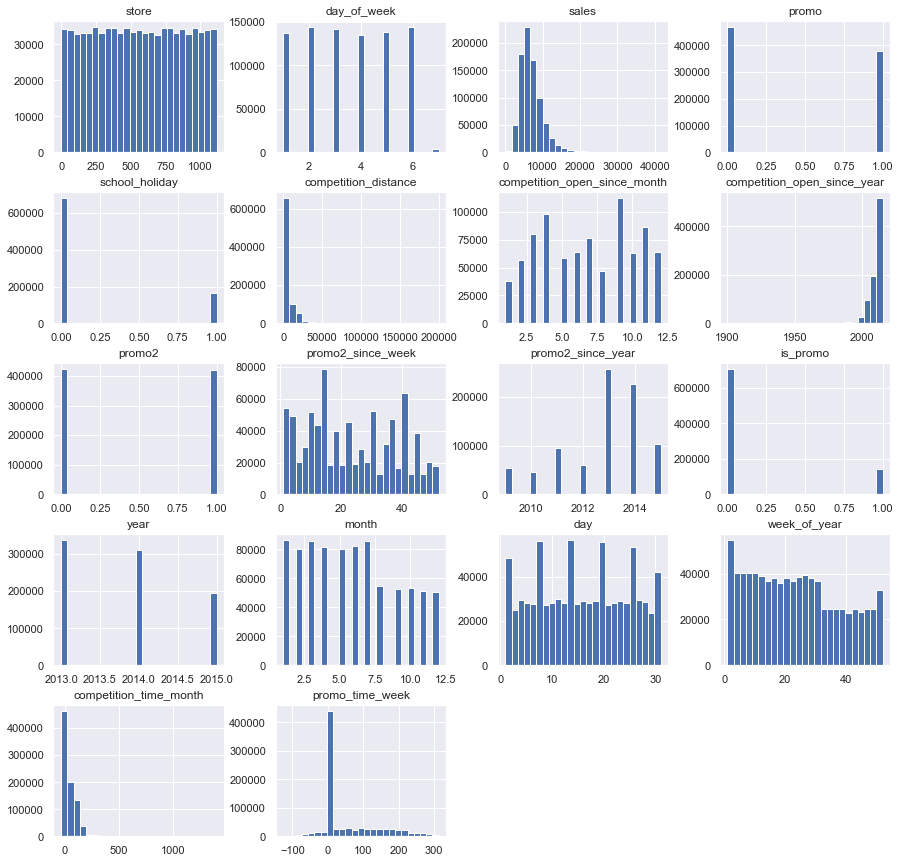

In [37]:
a = df4.select_dtypes(include=['int64', 'float64'])

sns.set(rc={"figure.figsize": (15, 15)})
a.hist(bins = 25);

## Categorical Variable

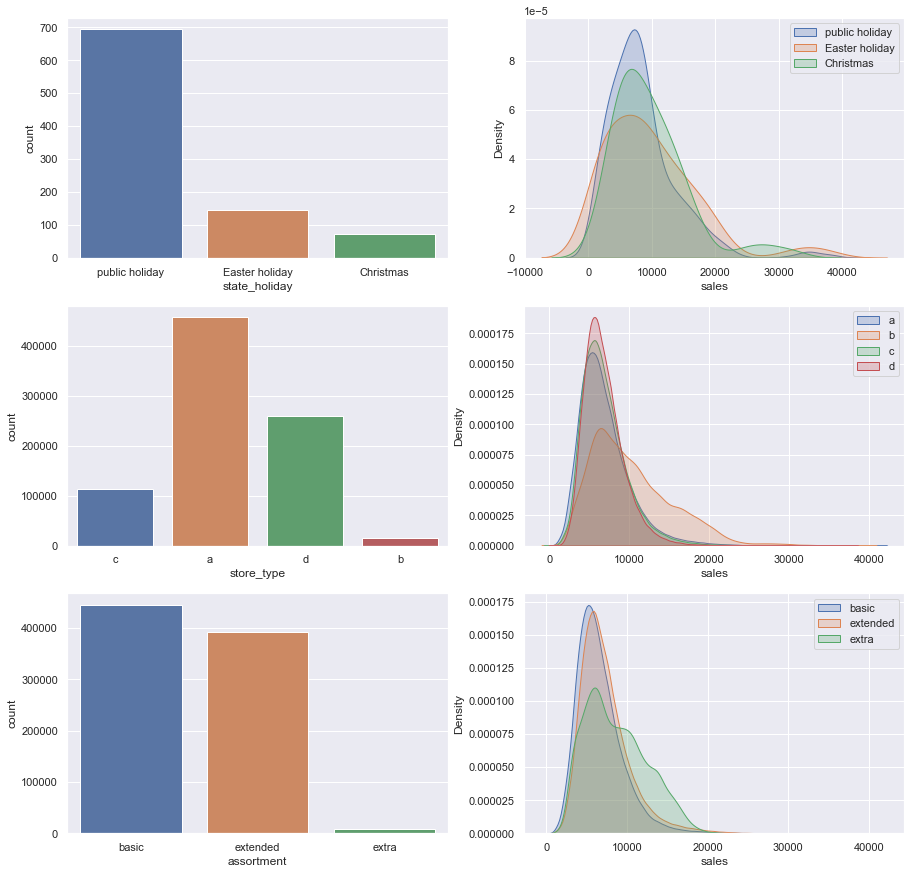

In [38]:
#state_holiday
plt.subplot(3,2,1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(3,2,2)
sns.kdeplot(df4['sales'][df4['state_holiday'] == 'public holiday'], shade = True)


sns.kdeplot(df4['sales'][df4['state_holiday'] == 'Easter holiday'], shade = True) 


sns.kdeplot(df4['sales'][df4['state_holiday'] == 'Christmas'], shade = True)
plt.legend(['public holiday', 'Easter holiday', 'Christmas']) 


#store_type
plt.subplot(3,2,3)
sns.countplot(df4['store_type'])

plt.subplot(3,2,4)
sns.kdeplot(df4['sales'][df4['store_type'] == 'a'], shade = True)

sns.kdeplot(df4['sales'][df4['store_type'] == 'b'], shade = True)

sns.kdeplot(df4['sales'][df4['store_type'] == 'c'], shade = True)
plt.legend(['public holiday', 'Easter holiday', 'Christmas'])

sns.kdeplot(df4['sales'][df4['store_type'] == 'd'], shade = True)
plt.legend(['a', 'b', 'c', 'd'])


#assortment
plt.subplot(3,2,5)
sns.countplot(df4['assortment']) 

plt.subplot(3,2,6)
sns.kdeplot(df4['sales'][df4['assortment'] == 'basic'], shade = True)
sns.kdeplot(df4['sales'][df4['assortment'] == 'extended'], shade = True)

sns.kdeplot(df4['sales'][df4['assortment'] == 'extra'], shade = True)
plt.legend(['basic', 'extended', 'extra'])

- State_holiday analysis of the graphs:

- In these two graphs, you can see that although Christmas has a lower sales volume than Easter Holiday, christmas has a higher peak than easter holiday, which means that although it sells less than the others, it has a high density of sales.

- While on easter holiday, in spite of selling more than on christmas, it has a moderate sales density, sometimes it sells a lot, sometimes a little sometimes it sells medium.


- Store_type analysis of the graphs:

- The type a of store in the store_type column, in spite of having a high sales volume, does not have such a high peak, which means that there are stores of type a that sell low, medium, high, that is, it's diversified.

- While d type stores have a high concentration of sales, that is, they always sell little, according also to the first graph.




- Store_type analysis of the graphs:
    
- Extra sells little and has a lower peak, but has a wider distribution, which means that there are more stores with different types of extra, there are stores that sell more with extra, and stores that sell less with extra.

## Hyphotesis Validation

### H1.** Stores with higher assortment should sell more.
**False** Stores with higher assortment sell less.

In [ ]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x = 'assortment', y = 'sales', data = aux1);

assortment     basic  extended   extra
year_week                             
2013-00     13434262  12425669  269404
2013-01     26007250  22917693  350279
2013-02     17970974  16029584  377207
2013-03     24392076  21243431  404662
2013-04     19972891  18130077  363061
...              ...       ...     ...
2015-26     27840342  27165959  684180
2015-27     20356210  20449036  586036
2015-28     25746704  25629698  632017
2015-29     19257263  19570832  574020
2015-30     23492454  23301780  436689

[137 rows x 3 columns]


<AxesSubplot:xlabel='year_week'>

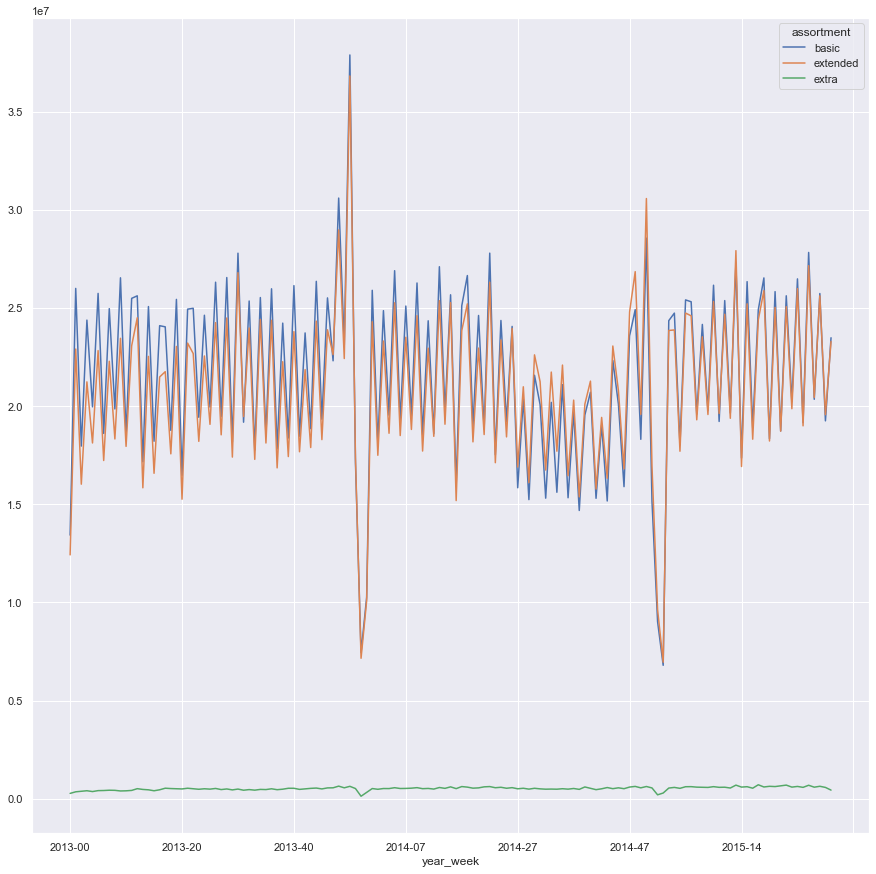

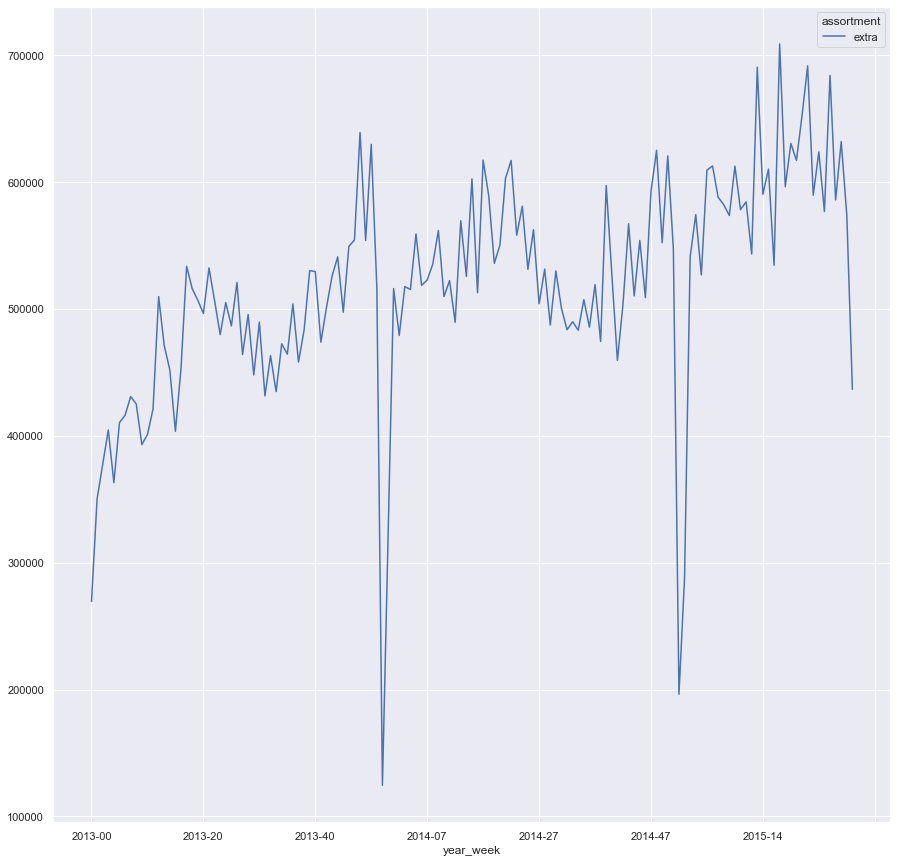

In [41]:
aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux3 = aux2.pivot(index = 'year_week', columns = 'assortment', values = 'sales')
print(aux3)
aux3.plot()

aux4 = aux2[aux2['assortment'] == 'extra']
aux4.pivot(index = 'year_week', columns = 'assortment', values = 'sales').plot()
#VARIABLE RELEVANT TO THE MODEL BECAUSE IT HAS TWO TYPES OF BEHAVIOR.

### H2.** Stores with closer competitors should sell less.
**FALSE** Stores with CLOSER COMPETITORS sell MORE.

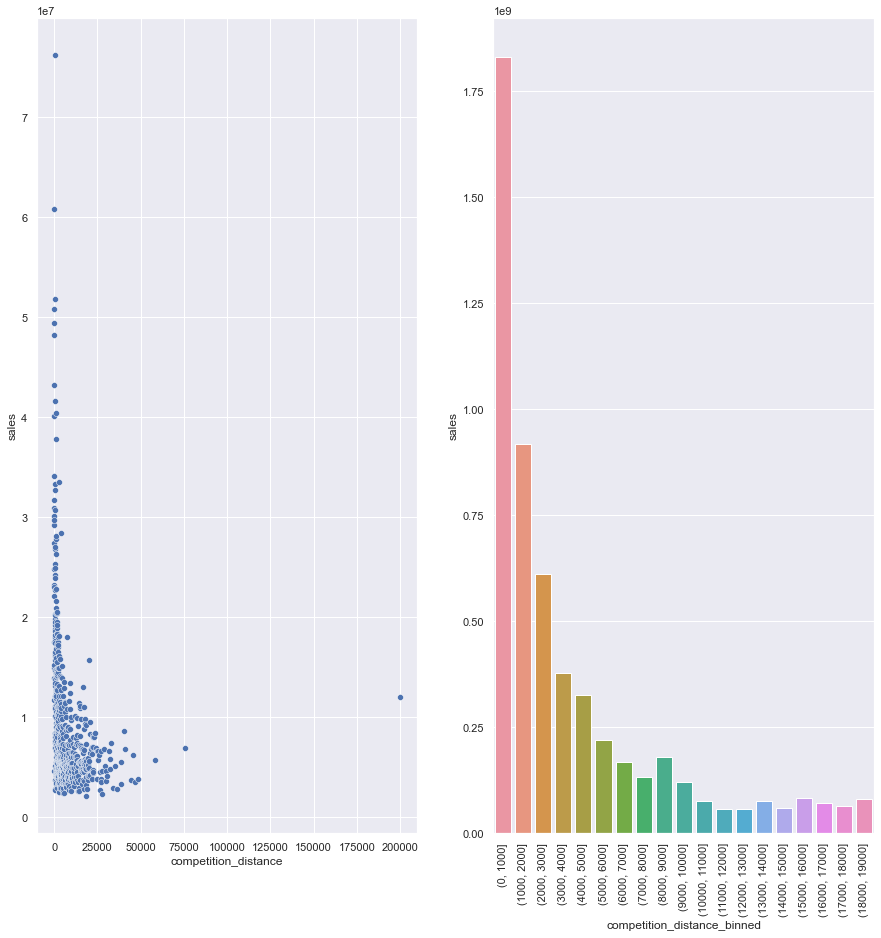

In [58]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()
plt.subplot(1,2,1)
sns.scatterplot(x = 'competition_distance', y = 'sales', data = aux1);

plt.subplot(1,2,2)
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins = bins)

aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()

sns.barplot(x = 'competition_distance_binned', y = 'sales', data = aux2);
plt.xticks(rotation=90);

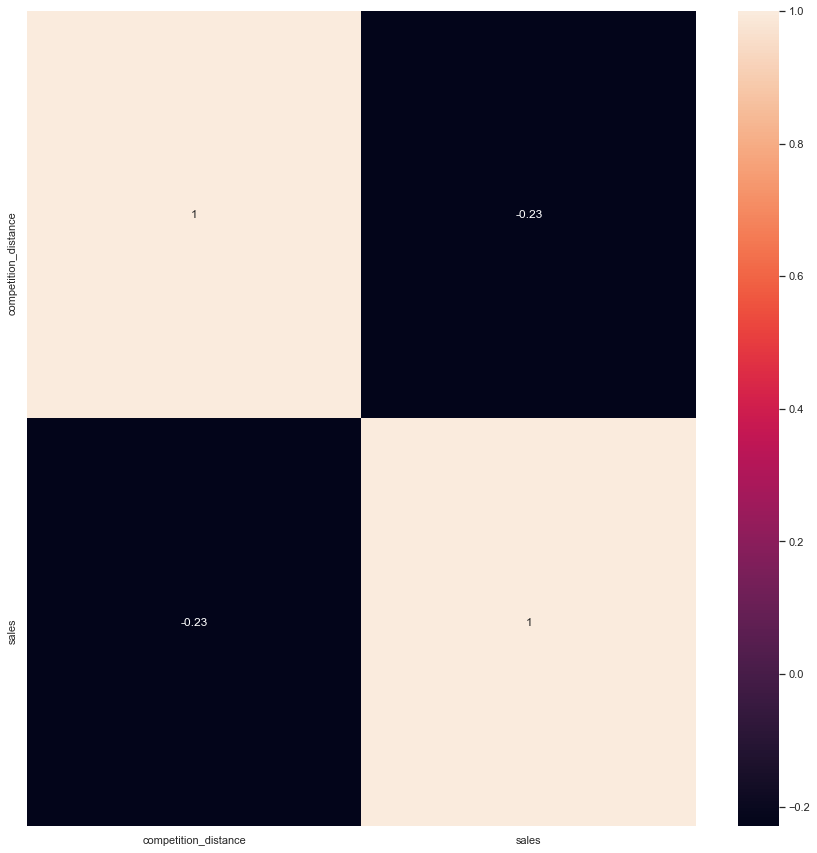

In [59]:
# CHECK IF THE VARIABLE IS IMPORTANT TO THE MODEL, correlation between competition distance and sales, 
# to see the impact of one on the other.

# ANSWER: Weak correlation, because the closer to 1 or -1, the higher the correlation
# the closer to 0 the weaker the correlation
# - 0.23 means the more distant the competitor is, the lower the selling.
sns.heatmap(aux1.corr(method = 'pearson'), annot = True);

### **H8.** Stores should sell more over the years.
**FALSE** Stores sell less over the years.

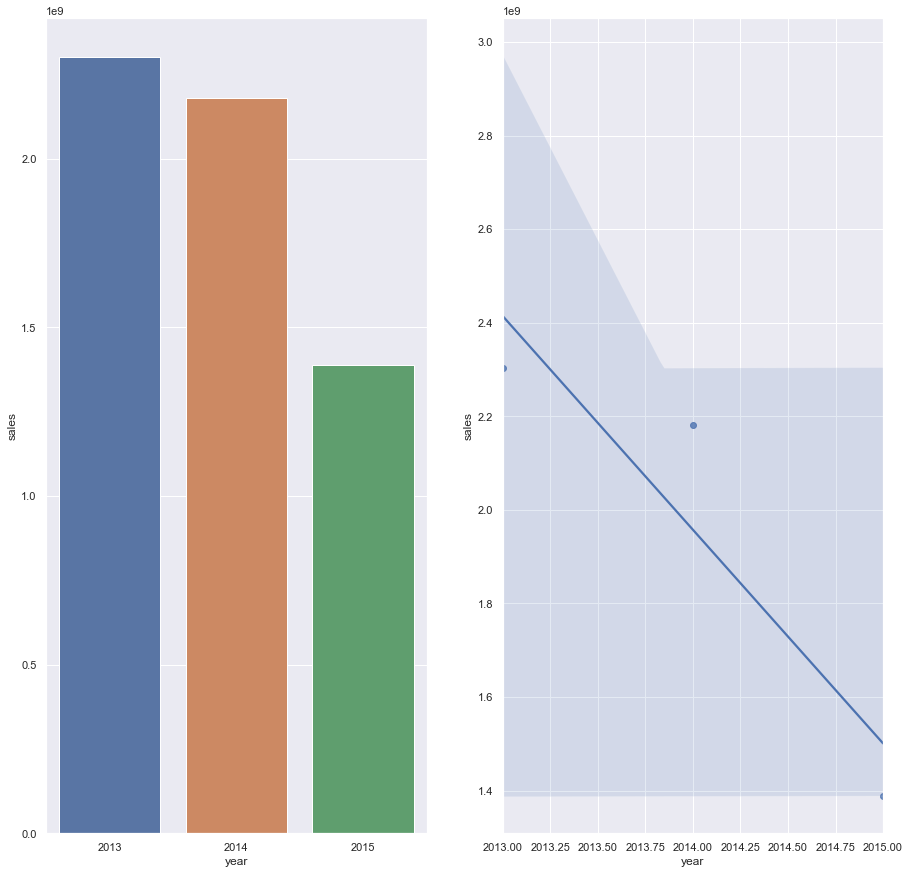

In [51]:
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()

plt.subplot(1,2,1)
sns.barplot(x = 'year', y = 'sales', data = aux1);

plt.subplot(1,2,2)
sns.regplot(x = 'year', y = 'sales', data = aux1);

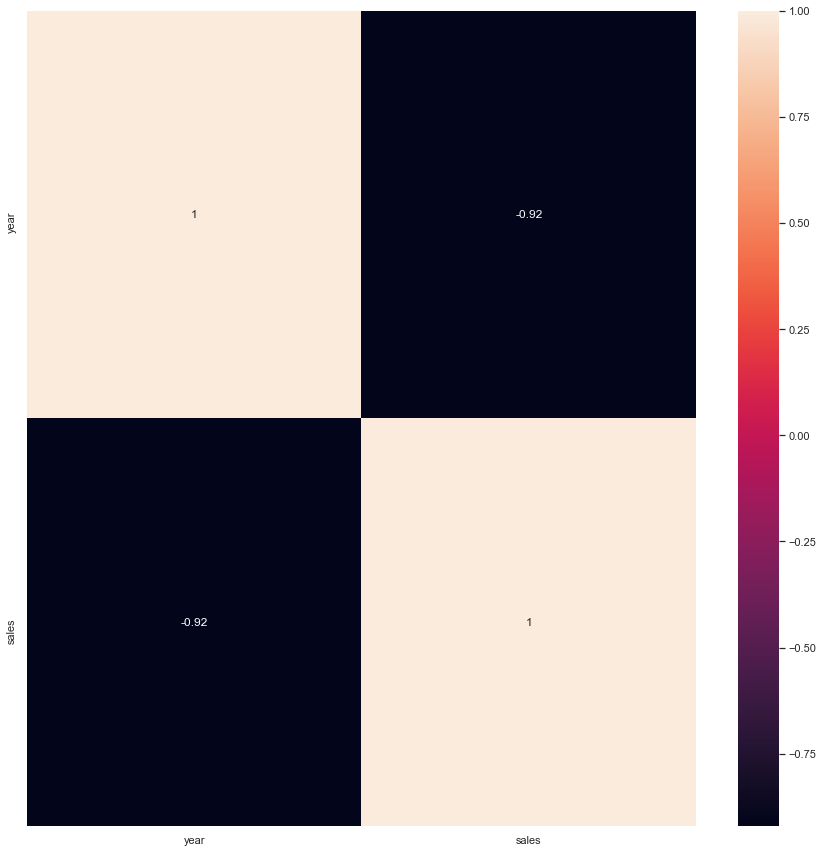

In [52]:
# CHECK IF THE VARIABLE IS IMPORTANT TO THE MODEL, correlation between the 'year' and sales, 
# to see the impact of one on the other.

# ANSWER: very high correlation, because the closer to 1 or -1, the higher the correlation
# the closer to 0 the weaker the correlation
# - 0.92 means the older, the higher the sell.
sns.heatmap(aux1.corr(method = 'pearson'), annot = True);

### **H11.** Stores should sell less on weekends.
**TRUE** Stores sell less on weekends.

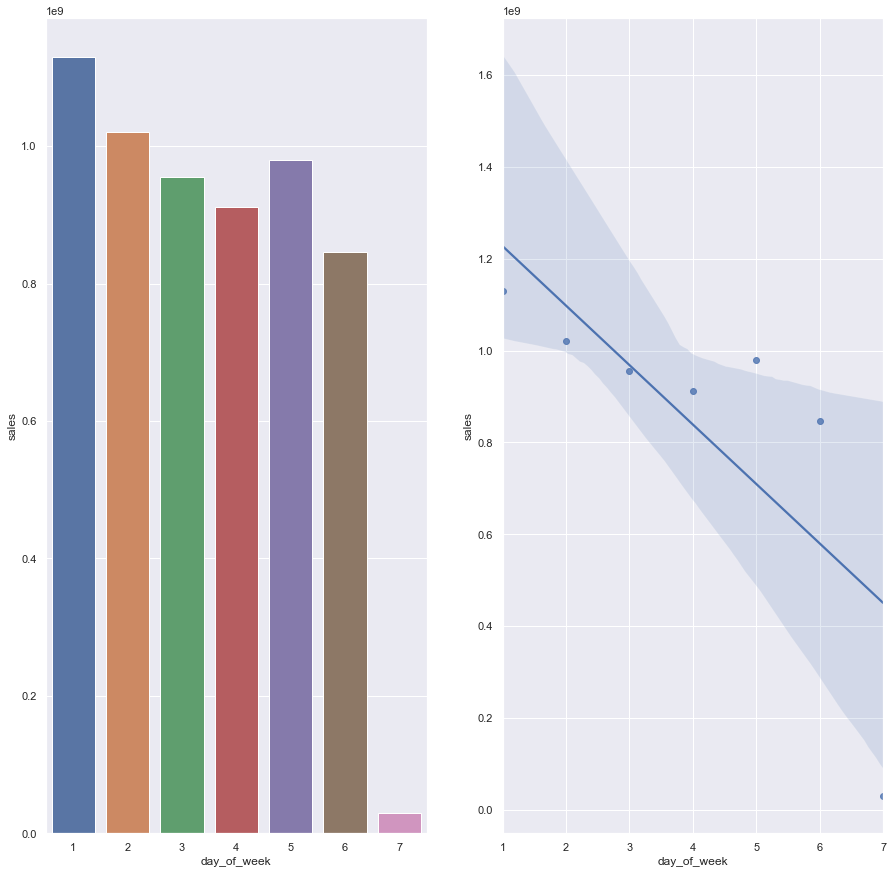

In [47]:
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,2,1)
sns.barplot(x = 'day_of_week', y = 'sales', data = aux1);

plt.subplot(1,2,2)
sns.regplot(x = 'day_of_week', y = 'sales', data = aux1);

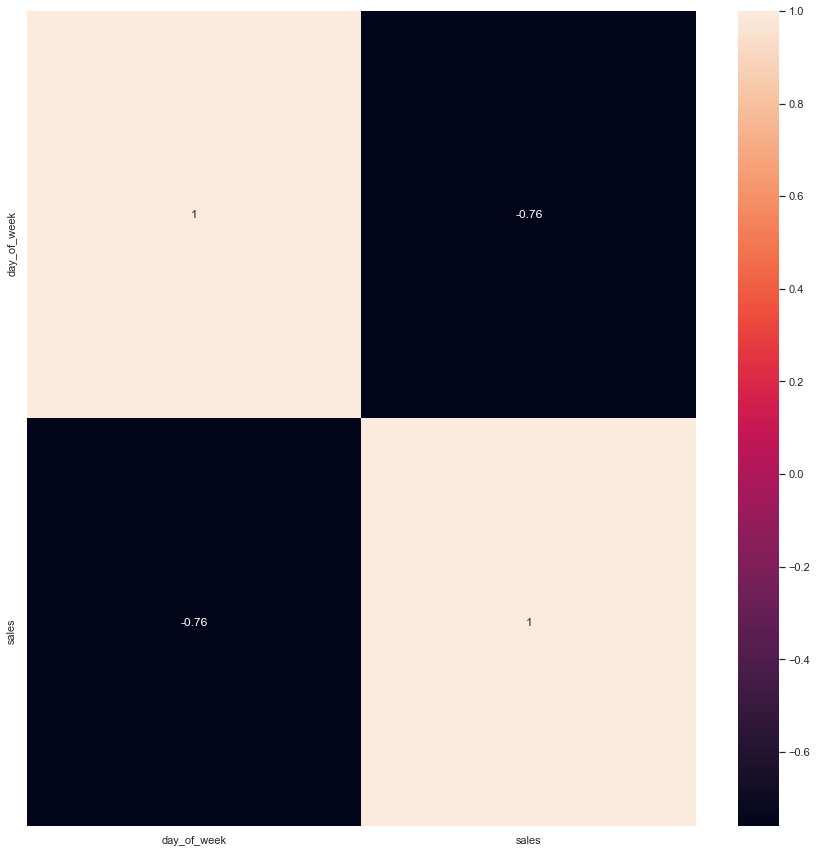

In [50]:
# CHECK IF THE VARIABLE IS IMPORTANT FOR THE MODEL, correlation between day_of_week and sales, 
# to see the impact of one on the other.

# ANSWER: high correlation, because the closer to 1 or -1, the higher the correlation
# the closer to 0 the weaker the correlation
# - 0.76 means the closer to the beginning of the week, the higher the sell.
sns.heatmap(aux1.corr(method = 'pearson'), annot = True);

## Summary of Hypotheses.

In [3]:
tab = [['Hipoteses', 'Conclusion', 'Relevance'],
      ['H1', 'False', 'Low'],
      ['H2', 'False', 'Medium'],
      ['H3', 'False', 'Medium'],
      ['H4', 'False', 'Low'],
      ['H5', '-', '-'],
      ['H6', 'False', 'Low'],
      ['H7', 'False', 'Medium'],
      ['H8', 'False', 'High'],
      ['H9', 'False', 'High'],
      ['H10', 'True', 'High'],
      ['H11', 'True', 'High'],
      ['H12', 'True', 'Low']]
print(tabulate(tab,headers = 'firstrow'))
       

Hipoteses    Conclusion    Relevance
-----------  ------------  -----------
H1           False         Low
H2           False         Medium
H3           False         Medium
H4           False         Low
H5           -             -
H6           False         Low
H7           False         Medium
H8           False         High
H9           False         High
H10          True          High
H11          True          High
H12          True          Low


## Multivariate Analysis

### Numerical Attributes

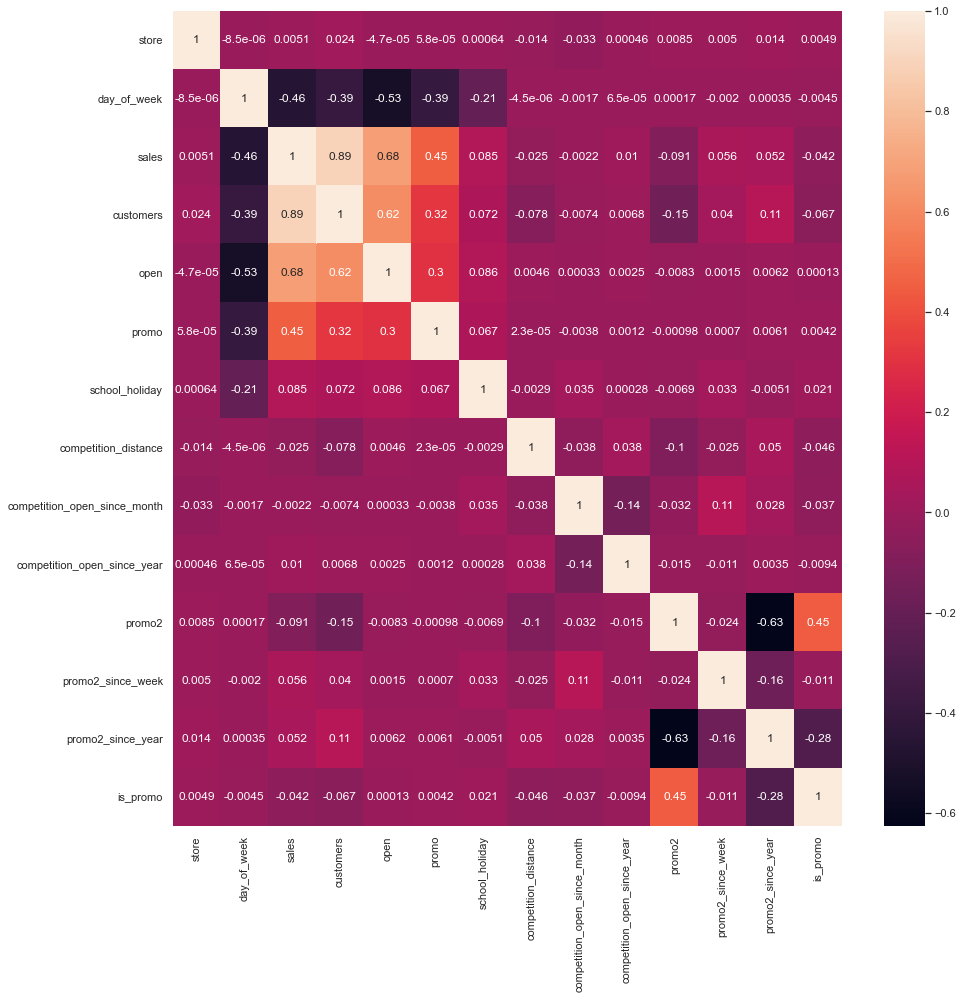

In [53]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

# the closer the color black the higher the negative correlation
# the closer the color white the higher the positive correlation

# pearson method only used on numerical variables

### Categorical Attributes

<AxesSubplot:>

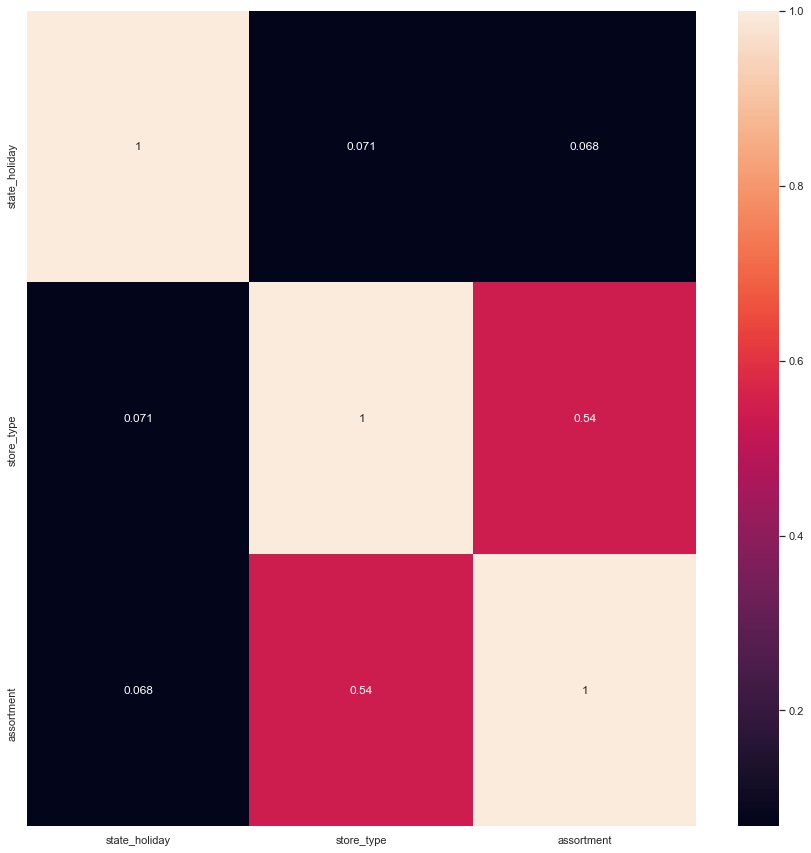

In [52]:
# only categorical data

#a = df4.select_dtypes(include = 'object')
#a = df4
a = df4[['state_holiday', 'store_type', 'assortment']]
#calculate cramer v

# method used: Cramer v
# goes from 0 to 1
# the closer to 0 the lower the correlation
# the closer to 1 the higher the correlation

a1 = cramer_v(a['state_holiday'],a['state_holiday'])
a2 = cramer_v(a['state_holiday'],a['store_type'])
a3 = cramer_v(a['state_holiday'],a['assortment'])

a4 = cramer_v(a['store_type'],a['state_holiday'])
a5 = cramer_v(a['store_type'],a['store_type'])
a6 = cramer_v(a['store_type'],a['assortment'])

a7 = cramer_v(a['assortment'],a['state_holiday'])
a8 = cramer_v(a['assortment'],a['store_type'])
a9 = cramer_v(a['assortment'],a['assortment'])


#final dataset
d = pd.DataFrame({'state_holiday': [a1, a2, a3],
              'store_type': [a4, a5, a6],
              'assortment': [a7, a8, a9]})

d = d.set_index(d.columns)

sns.heatmap(d, annot = True)

# MACHINE LEARNING

## Compare Model's Performance

In [225]:
modelling_result_cv = pd.concat([lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv])
modelling_result_cv.sort_values('RMSE CV')

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest,838.58 +/- 219.77,0.12 +/- 0.02,1258.3 +/- 321.27
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Lasso,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26
0,XGBoost Regressor,7049.09 +/- 588.52,0.95 +/- 0.0,7715.15 +/- 689.43


# <font color = 'blue'> 4. Conclusion & Demonstration </font>

# ERROR TRANSLATION AND INTERPRETATION

## Business Performance

In [104]:
# sorting stores by MAPE from high to low value
df92.sort_values('MAPE', ascending = False).head()

# to solve these high values you can make specific models for these stores, or put more variables, or try to 
# understand why it's so high

,store,predictions,worts_scenario,best_scenario,MAE,MAPE
291,292,104663.859,101320.378,108007.341,3343.482,0.558
908,909,234994.781,227266.386,242723.177,7728.396,0.526
594,595,353629.469,348883.968,358374.969,4745.501,0.329
875,876,199399.781,195450.636,203348.927,3949.146,0.302
285,286,165833.203,165012.427,166653.979,820.776,0.300


<AxesSubplot:xlabel='store', ylabel='MAPE'>

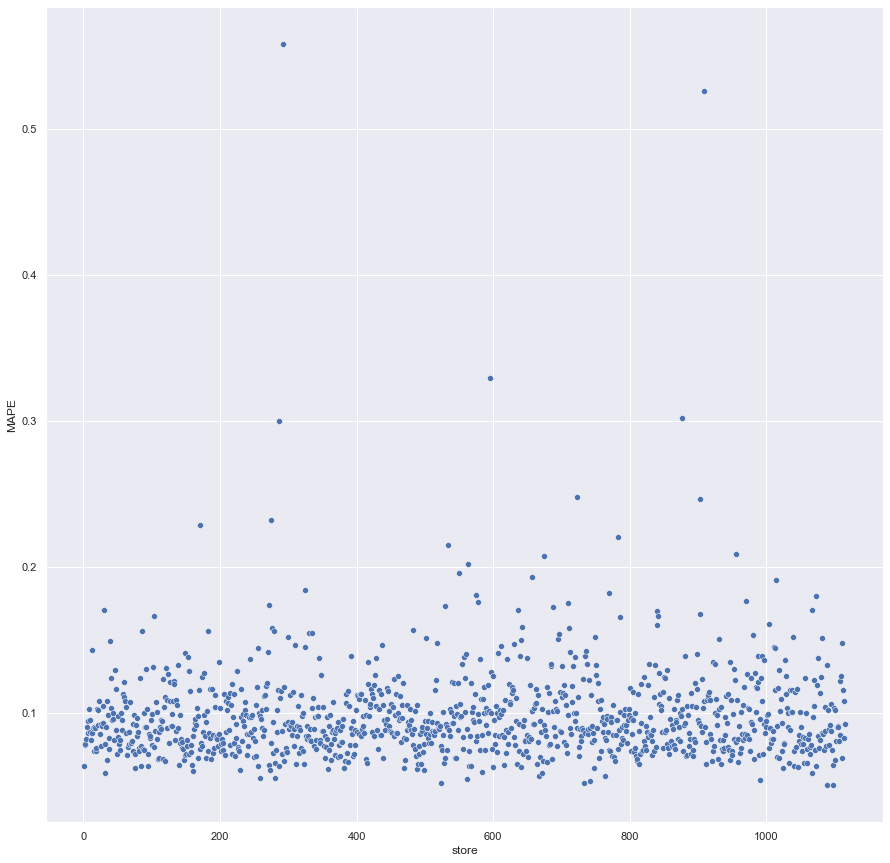

In [106]:
# sorting stores by MAPE from high to low value per plot
sns.scatterplot(x = 'store', y = 'MAPE', data = df92)

## Total Performance

In [107]:
df93 = df92[['predictions', 'worts_scenario', 'best_scenario']].apply(lambda x: np.sum(x), axis = 0).reset_index().rename(columns = {'index' : 'Scenario', 0 : 'Values'})
df93['Values'] = df93['Values'].map('R${:,.2f}'.format)
df93

,Scenario,Values
0,predictions,"R$285,009,024.00"
1,worts_scenario,"R$284,262,964.81"
2,best_scenario,"R$285,755,110.88"


## Machine Learning Performance

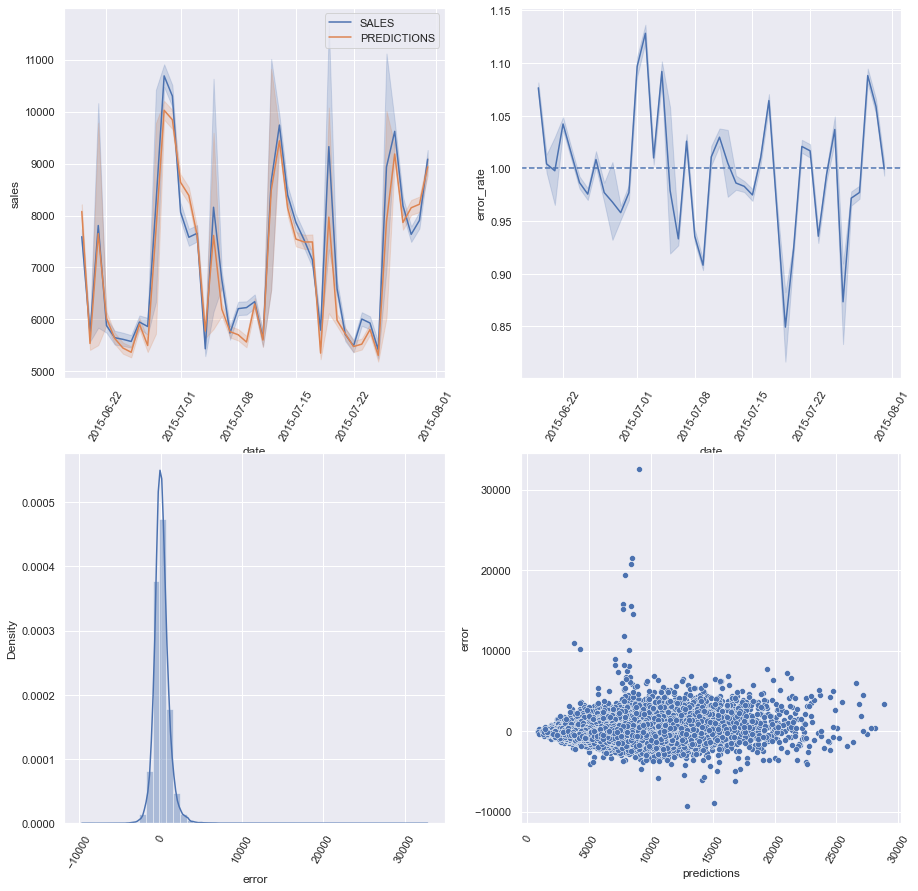

In [110]:
sns.set(rc={"figure.figsize": (15, 15)})
plt.subplot(2,2,1)
#COMPARISON BETWEEN SALES AND PREDICTION IN THE LAST 6 WEEKS
sns.lineplot(x = 'date', y = 'sales', data = df9, label = 'SALES')
sns.lineplot(x = 'date', y = 'predictions', data = df9, label = 'PREDICTIONS')
plt.xticks(rotation=60);

plt.subplot(2,2,2)
# CHECK THE ERROR RATE PER DAY FOR THE LAST 6 WEEKS
sns.lineplot(x = 'date', y = 'error_rate', data = df9)
plt.axhline(1,linestyle = '--')
plt.xticks(rotation=60);
# values above one have an overestimation of the forecast relative to sales
# values below one have an underestimation of the forecast in relation to sales

plt.subplot(2,2,3)
#CHECKS IF THE ERROR RATE DISTRIBUTION LOOKS LIKE A NORMAL DISTRIBUTION
sns.distplot(df9['error'])
plt.xticks(rotation=60);
# used to do residual analysis

plt.subplot(2,2,4)
#DISTRIBUTION OF PREDICTIONS VARIABLES BY ERROR
sns.scatterplot(df9['predictions'], df9['error'])
plt.xticks(rotation=60);
# used to do residue analysis

# <font color = 'blue'> 5. Next Steps </font>

- Workshop do Modelo para os Business Users
- Coletar Feedbacks sobre a Usabilidade
- Aumentar em 10% a Acuracia do Modelo

# <font color = 'blue'> Thank You So Much! </font>